<img src='https://img-blog.csdn.net/20180927190558256?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dzcF8xMTM4ODg2MTE0/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70'>

<img src="https://miro.medium.com/max/875/1*Py75v-74yoCNA8PgLU6wEw.png" width="90%"> 

<img src="https://miro.medium.com/max/875/1*T7o1lv_Xnkjct-426TAZeQ.png" width="90%"> 

In [2]:
# 導入 程式庫 import libraries 
# 導入 程式庫 import OpenCV library
import cv2

# 導入 程式庫 import matplotlib library
import matplotlib.pyplot as plt

# 導入 程式庫 importing time library for speed comparisons of both classifiers
import time 

%matplotlib inline

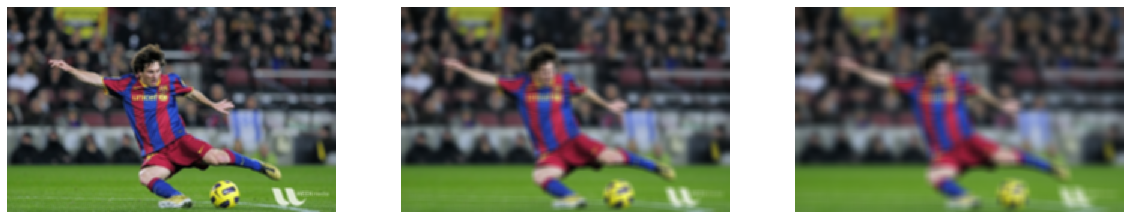

In [6]:
# 導入圖像 並轉換為 RGB
# Import the image and convert to RGB 

img = cv2.imread('data/messi.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 使用不同的內核大小 繪製 圖像
# Plot the image with different kernel sizes
kernels = [5, 11, 17]
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for ind, s in enumerate(kernels):
    img_blurred = cv2.blur(img, ksize = (s, s))
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')
plt.show()

<img src="https://miro.medium.com/max/1250/1*snCwfwgq5-0JMky-h4DmbQ.png" width="90%"> 

<img src="https://miro.medium.com/max/1250/1*N22d0C7ZF6WocZngNCW9gA.png" width="90%"> 

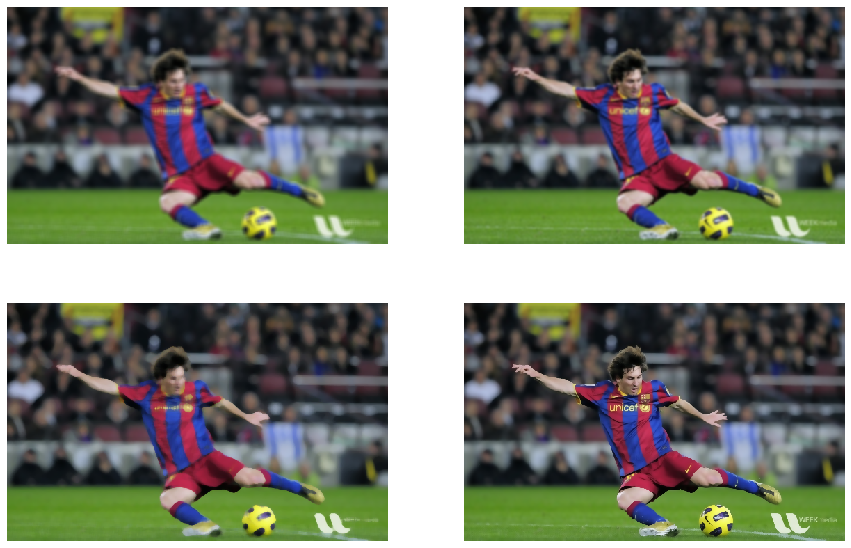

In [21]:
# 模糊 圖像
# Blur the image 

img_0 = cv2.blur(img, ksize = (7, 7))
img_1 = cv2.GaussianBlur(img, ksize = (7, 7), sigmaX = 0)   
img_2 = cv2.medianBlur(img, 7)
img_3 = cv2.bilateralFilter(img, 7, sigmaSpace = 75, sigmaColor =75)


# Plot the images
# 繪製 圖像
images = [img_0, img_1, img_2, img_3]
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
for ind, p in enumerate(images):
    ax = axs[ind//2,ind%2]
    ax.imshow(p)
    ax.axis('off')
plt.show()

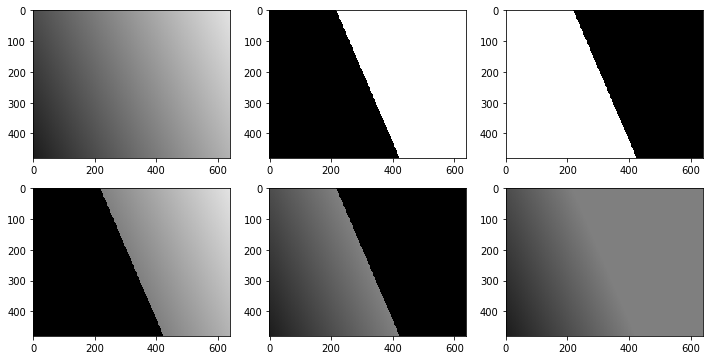

In [29]:
img = cv2.imread('data/gradation.png')

# 閾值不同的參數設定
# Thresholding 
# 
_, thresh_0 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh_1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh_2 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, thresh_3 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
_, thresh_4 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

# 繪製 圖像
# Plot the images

images = [img, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 6))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p)
plt.show()

<img src="https://miro.medium.com/max/511/1*swjBYQOnuNfv1rHM3p39PQ.png" width="80%"> 

In [35]:
# 將 圖像 轉換為 灰度
# Convert the image to grayscale


img = cv2.imread('data/messi.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# 自適 應閾值
# Adaptive Thresholding


_,thresh_binary = cv2.threshold(img, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)
adap_mean_2 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 2)
adap_mean_2_inv = cv2.adaptiveThreshold(img, 255, 
                                        cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 7, 2)
adap_mean_8 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 8)
adap_gaussian_8 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv2.THRESH_BINARY, 7, 8)

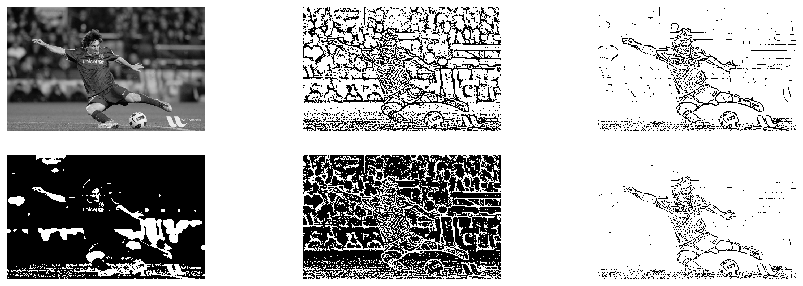

In [41]:
# 繪製圖像
# Plot the images

images = [img, thresh_binary, adap_mean_2, adap_mean_2_inv, 
          adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 5))
for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
plt.show()

<img src="https://miro.medium.com/max/1250/1*Y-x9AjrP7F0mlRo3xr822w.png" width="100%"> 

In [43]:
# 漸變 過濾
# Apply gradient filtering

sobel_x = cv2.Sobel(img, cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, dx = 0, dy = 1, ksize = 5)
blended = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y,
                          beta=0.5, gamma=0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

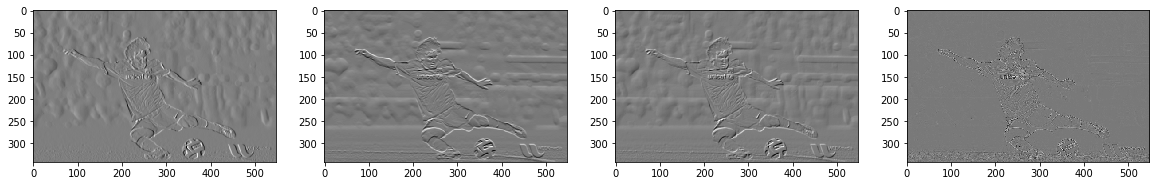

In [44]:
# 繪製圖像
# Plot the images
images = [sobel_x, sobel_y, blended, laplacian]
plt.figure(figsize = (20, 20))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.axis('on') # off
plt.show()